In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("mushrooms.csv")
print(df)

     class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0               c         n

In [3]:
x=df

In [4]:
from sklearn.preprocessing import LabelEncoder

l=LabelEncoder()
x['cap-shape']=l.fit_transform(x['cap-shape'])
x['cap-color']=l.fit_transform(x['cap-color'])
x['bruises']=l.fit_transform(x['bruises'])
x['odor']=l.fit_transform(x['odor'])
x['gill-attachment']=l.fit_transform(x['gill-attachment'])
x['gill-size']=l.fit_transform(x['gill-size'])
x['gill-color']=l.fit_transform(x['gill-color'])
x['stalk-shape']=l.fit_transform(x['stalk-shape'])
x['population']=l.fit_transform(x['population'])
x['veil-color']=l.fit_transform(x['veil-color'])
x['ring-type']=l.fit_transform(x['ring-type'])
x['spore-print-color']=l.fit_transform(x['spore-print-color'])
x['habitat']=l.fit_transform(x['habitat'])
x['class']=l.fit_transform(x['class'])
x['stalk-color-below-ring']=l.fit_transform(x['stalk-color-below-ring'])
x['cap-surface']=l.fit_transform(x['cap-surface'])
x['stalk-surface-below-ring']=l.fit_transform(x['stalk-surface-below-ring'])
x['stalk-surface-above-ring']=l.fit_transform(x['stalk-surface-above-ring'])
x['gill-spacing']=l.fit_transform(x['gill-spacing'])



In [5]:
y=df["class"]
print(y)

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32


In [6]:
df.drop("class",axis=1,inplace=True)
df.drop("stalk-root",axis=1,inplace=True)
df.drop("stalk-color-above-ring",axis=1,inplace=True)
df.drop("ring-number",axis=1,inplace=True)
df.drop("veil-type",axis=1,inplace=True)
x=df
print(df)

      cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0             5            2          4        1     6                1   
1             5            2          9        1     0                1   
2             0            2          8        1     3                1   
3             5            3          8        1     6                1   
4             5            2          3        0     5                1   
...         ...          ...        ...      ...   ...              ...   
8119          3            2          4        0     5                0   
8120          5            2          4        0     5                0   
8121          2            2          4        0     5                0   
8122          3            3          4        0     8                1   
8123          5            2          4        0     5                0   

      gill-spacing  gill-size  gill-color  stalk-shape  \
0                0          1           4

In [7]:
print(x)

      cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0             5            2          4        1     6                1   
1             5            2          9        1     0                1   
2             0            2          8        1     3                1   
3             5            3          8        1     6                1   
4             5            2          3        0     5                1   
...         ...          ...        ...      ...   ...              ...   
8119          3            2          4        0     5                0   
8120          5            2          4        0     5                0   
8121          2            2          4        0     5                0   
8122          3            3          4        0     8                1   
8123          5            2          4        0     5                0   

      gill-spacing  gill-size  gill-color  stalk-shape  \
0                0          1           4

In [8]:
print(y)

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x ,y ,test_size=0.25 ,random_state=0)
print(x_train.shape)
print(x_test.shape)

(6093, 18)
(2031, 18)


In [11]:
from sklearn.preprocessing import MinMaxScaler
st_x=MinMaxScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.fit_transform(x_test)
print(x_train)

[[0.4        1.         1.         ... 0.125      1.         0.16666667]
 [1.         1.         0.44444444 ... 0.375      1.         0.16666667]
 [0.4        0.66666667 0.33333333 ... 0.25       0.         0.16666667]
 ...
 [1.         0.66666667 0.33333333 ... 0.375      0.6        0.16666667]
 [0.4        0.         0.44444444 ... 0.375      0.8        0.        ]
 [1.         1.         0.33333333 ... 0.375      1.         0.        ]]


In [13]:
from sklearn.neural_network import MLPClassifier

classifier=MLPClassifier(hidden_layer_sizes=(8,8,8),activation="relu",solver="adam",max_iter=500)
classifier.fit(x_train,y_train)

x_pred=classifier.predict(x_train)
y_pred=classifier.predict(x_test)

In [14]:
print(y_test.values)
print()
print(y_pred)

[1 0 0 ... 1 0 0]

[1 0 0 ... 1 0 0]


In [15]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test,y_pred)
print(c)

[[1061    0]
 [   0  970]]


In [16]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_train,x_pred)
print(c)

[[3147    0]
 [   0 2946]]


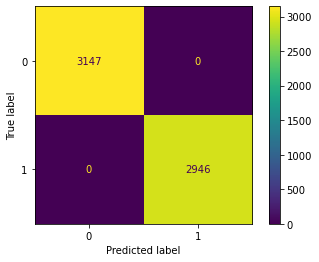

In [17]:
##Confusion Matrix Display

from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=c,display_labels=classifier.classes_)

disp.plot()

In [18]:
#Evaluationg our model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {}'.format(precision_score(y_test, y_pred,pos_label=0)))
print('Recall score: {}'.format(recall_score(y_test, y_pred,pos_label=0)))
print('F1 score: {}'.format(f1_score(y_test, y_pred,pos_label=0)))


Accuracy score: 1.0
Precision score: 1.0
Recall score: 1.0
F1 score: 1.0
